# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, accuracy_score, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score)
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# grid search
from sklearn.model_selection import RandomizedSearchCV

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\survey.csv")

In [3]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### EDA (Exploratory Data Analysis)

In [4]:
# Timestamp
# Age
# Gender
# Country
# state: If you live in the United States, which state or territory do you live in?
# self_employed: Are you self-employed?
# family_history: Do you have a family history of mental illness?
# treatment: Have you sought treatment for a mental health condition?
# work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
# no_employees: How many employees does your company or organization have?
# remote_work: Do you work remotely (outside of an office) at least 50% of the time?
# tech_company: Is your employer primarily a tech company/organization?
# benefits: Does your employer provide mental health benefits?
# care_options: Do you know the options for mental health care your employer provides?
# wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
# seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
# anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
# leave: How easy is it for you to take medical leave for a mental health condition?
# mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
# physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
# coworkers: Would you be willing to discuss a mental health issue with your coworkers?
# physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
# mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
# obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
# comments: Any additional notes or comments

In [5]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Remarks: 
There are a total of 26 columns in the dataset.
We see that except the age column, all the columns are of object datatype.
Comment column seems to contain most number ( 70% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.

In [7]:
data.shape

(1259, 27)

In [8]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [9]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
data.drop(columns=['comments', 'state', 'Timestamp','Country', ], inplace=True)
# 'comments' It lacks significant information for prediction, it can be dropped to reduce complexity.
# 'state' The dataset is international, state-level data may not be meaningful.
#'Timestamp' Just records when the survey was taken.
# 'Country' The dataset is international, Country data may not be meaningful.

In [11]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


### Duplicate Value Check

In [12]:
print(f"Duplicates before removal: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {data.duplicated().sum()}")


Duplicates before removal: 4
Duplicates after removal: 0


In [13]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique(), "\n")


Unique values in 'Gender':
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'] 

Unique values in 'self_employed':
[nan 'Yes' 'No'] 

Unique values in 'family_history':
['No' 'Yes'] 

Unique values in 'treatment':
['Yes' 'No'] 

Unique values in 'work_interfere':
['Often' 'Rarely' 'Never' 'Sometimes' nan] 

Unique values in 'no_employees':
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 

Unique values in 'remote_work':
['No' 'Yes'] 

Unique values in 'tech_company':
['Yes' '

In [14]:
def clean_gender(gender):
    gender = str(gender).strip().lower()  # Convert to lowercase and remove spaces
    
    # Categories for Male
    male_terms = ['m', 'male', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'msle', 'mail',
                  'malr', 'man', 'cis male', 'cis man', 'guy (-ish) ^_^', 'male ']

    # Categories for Female
    female_terms = ['f', 'female', 'cis female', 'femake', 'woman', 'female ', 'female (cis)', 'femail',
                    'cis-female/femme']

    # Everything else (including transgender identities) goes into "Other"
    if gender in male_terms:
        return 'Male'
    elif gender in female_terms:
        return 'Female'
    else:
        return 'Other'

# Apply function to Gender column
data['Gender'] = data['Gender'].apply(clean_gender)

# Verify the unique values after cleaning
print(data['Gender'].unique())

['Female' 'Male' 'Other']


In [15]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique(), "\n")


Unique values in 'Gender':
['Female' 'Male' 'Other'] 

Unique values in 'self_employed':
[nan 'Yes' 'No'] 

Unique values in 'family_history':
['No' 'Yes'] 

Unique values in 'treatment':
['Yes' 'No'] 

Unique values in 'work_interfere':
['Often' 'Rarely' 'Never' 'Sometimes' nan] 

Unique values in 'no_employees':
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 

Unique values in 'remote_work':
['No' 'Yes'] 

Unique values in 'tech_company':
['Yes' 'No'] 

Unique values in 'benefits':
['Yes' "Don't know" 'No'] 

Unique values in 'care_options':
['Not sure' 'No' 'Yes'] 

Unique values in 'wellness_program':
['No' "Don't know" 'Yes'] 

Unique values in 'seek_help':
['Yes' "Don't know" 'No'] 

Unique values in 'anonymity':
['Yes' "Don't know" 'No'] 

Unique values in 'leave':
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 

Unique values in 'mental_health_consequence':
['No' 'Maybe' 'Yes'] 

Unique values in 'phys_health_consequence':
['No'

# Encoding

In [16]:
# Dictionary to store encoding mappings
encoding_mappings = {}

# Identifying categorical columns automatically
categorical_columns = data.select_dtypes(include=['object']).columns

# Encoding all categorical variables
encode = LabelEncoder()

for col in categorical_columns:
    data[col] = encode.fit_transform(data[col].astype(str))  # Convert to string to handle NaNs
    encoding_mappings[col] = dict(zip(encode.classes_, encode.transform(encode.classes_)))  # Store mapping



In [17]:
data.head(25)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,2,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,2,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,2,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,2,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,2,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
5,33,1,2,1,0,3,4,0,1,2,...,0,0,1,1,2,2,1,0,0,0
6,35,0,2,1,1,3,0,1,1,1,...,1,1,0,0,1,0,1,1,0,0
7,39,1,2,0,0,0,0,1,1,1,...,2,0,1,1,0,0,1,1,1,0
8,42,0,2,1,1,3,1,0,1,2,...,1,3,0,1,2,2,1,0,1,0
9,23,1,2,0,0,0,2,0,1,0,...,0,0,1,1,2,2,0,0,2,0


### Statistical view of data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1255 non-null   int64
 1   Gender                     1255 non-null   int32
 2   self_employed              1255 non-null   int32
 3   family_history             1255 non-null   int32
 4   treatment                  1255 non-null   int32
 5   work_interfere             1255 non-null   int32
 6   no_employees               1255 non-null   int32
 7   remote_work                1255 non-null   int32
 8   tech_company               1255 non-null   int32
 9   benefits                   1255 non-null   int32
 10  care_options               1255 non-null   int32
 11  wellness_program           1255 non-null   int32
 12  seek_help                  1255 non-null   int32
 13  anonymity                  1255 non-null   int32
 14  leave                      12

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1255.0,7.968131e+07,2.822787e+09,-1726.0,27.0,31.0,36.0,1.000000e+11
Gender,1255.0,8.191235e-01,4.244717e-01,0.0,1.0,1.0,1.0,2.000000e+00
self_employed,1255.0,1.442231e-01,3.901658e-01,0.0,0.0,0.0,0.0,2.000000e+00
family_history,1255.0,3.904382e-01,4.880430e-01,0.0,0.0,0.0,1.0,1.000000e+00
treatment,1255.0,5.059761e-01,5.001636e-01,0.0,0.0,1.0,1.0,1.000000e+00
work_interfere,1255.0,2.336255e+00,1.374784e+00,0.0,1.0,3.0,3.0,4.000000e+00
no_employees,1255.0,2.784064e+00,1.740429e+00,0.0,1.0,3.0,4.0,5.000000e+00
remote_work,1255.0,2.996016e-01,4.582661e-01,0.0,0.0,0.0,1.0,1.000000e+00
tech_company,1255.0,8.191235e-01,3.850693e-01,0.0,1.0,1.0,1.0,1.000000e+00
benefits,1255.0,1.054980e+00,8.382818e-01,0.0,0.0,1.0,2.0,2.000000e+00


In [20]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [21]:
# Age can never be negative or in Billions, so apply filter
data = data[(data['Age'] > 0) & (data['Age'] < 100)]

In [22]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,2,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,2,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,2,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,2,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,2,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,4,2,0,1,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,1,0,1,1,1,2,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,34,1,0,1,1,3,5,0,1,2,...,0,1,2,2,0,0,1,1,1,0
1257,46,0,0,0,0,4,1,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1250.0,32.0240,7.384080,5.0,27.0,31.0,36.0,72.0
Gender,1250.0,0.8168,0.422588,0.0,1.0,1.0,1.0,2.0
self_employed,1250.0,0.1432,0.389378,0.0,0.0,0.0,0.0,2.0
family_history,1250.0,0.3904,0.488035,0.0,0.0,0.0,1.0,1.0
treatment,1250.0,0.5048,0.500177,0.0,0.0,1.0,1.0,1.0
work_interfere,1250.0,2.3376,1.375041,0.0,1.0,3.0,3.0,4.0
no_employees,1250.0,2.7864,1.738733,0.0,1.0,3.0,4.0,5.0
remote_work,1250.0,0.2984,0.457739,0.0,0.0,0.0,1.0,1.0
tech_company,1250.0,0.8200,0.384341,0.0,1.0,1.0,1.0,1.0
benefits,1250.0,1.0528,0.838674,0.0,0.0,1.0,2.0,2.0


# Correlation

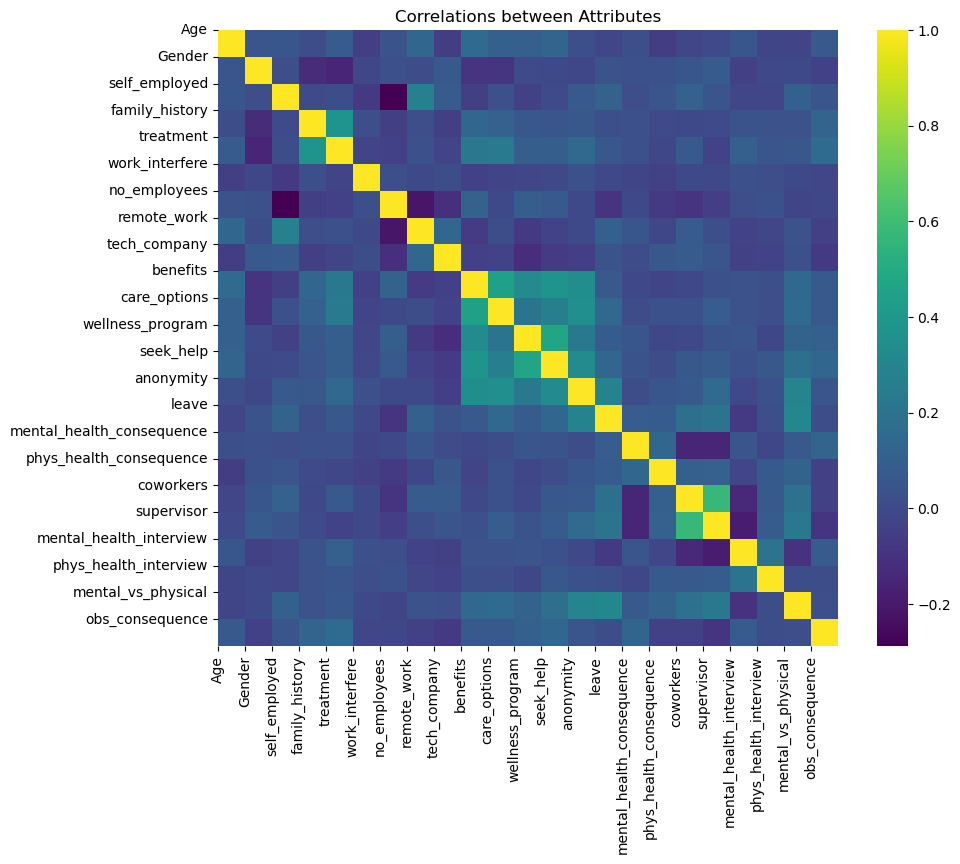

In [24]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='viridis')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
#plt.colorbar()
plt.title("Correlations between Attributes")
plt.show()

# Vizulisation

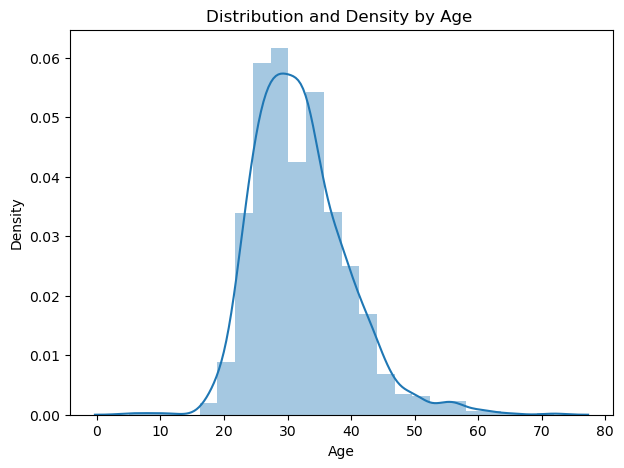

In [25]:
# Distribution and Density of Age 
plt.figure(figsize=(7,5))
sns.distplot(data['Age'],bins=24)
plt.title('Distribution and Density by Age ')
plt.xlabel('Age')
plt.show()

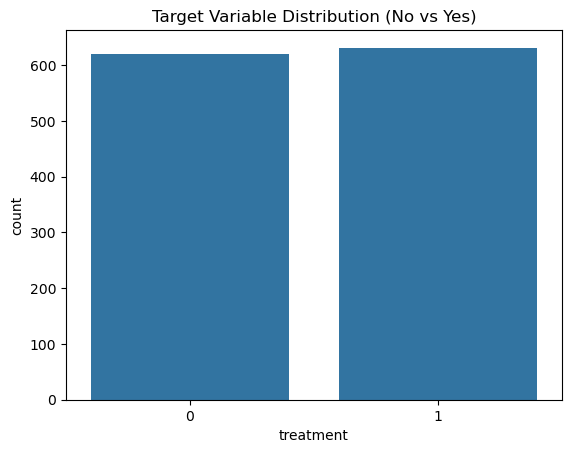

In [26]:
sns.countplot(x="treatment", data=data)
plt.title("Target Variable Distribution (No vs Yes)")
plt.show() # No need to SMOTE()

In [27]:
for col in data.columns:
    if col == 'Age': continue
    # Age has some outliers by the way 
    print(col)
    print("-"*100)
    print(data[col].value_counts())
    print("+"*100)

Gender
----------------------------------------------------------------------------------------------------
Gender
1    985
0    247
2     18
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
self_employed
----------------------------------------------------------------------------------------------------
self_employed
0    1089
1     143
2      18
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
family_history
----------------------------------------------------------------------------------------------------
family_history
0    762
1    488
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
treatment
----------------------------------------------------------------------------------------------------
treatment
1    631
0    619
Name: count, dtype: int64
++++

# Divide data in target and features

In [28]:
X=data.drop('treatment',axis=1)
y=data['treatment']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the data

In [30]:
scale=MinMaxScaler()
X_train['Age']=scale.fit_transform(X_train[['Age']])
X_test['Age']=scale.fit_transform(X_test[['Age']])

In [31]:
X_train

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1202,0.388060,1,1,0,4,0,0,1,1,2,...,1,0,1,1,2,2,1,0,0,0
917,0.432836,1,1,0,3,0,1,1,1,0,...,2,1,1,1,1,1,1,1,2,0
425,0.238806,1,0,0,3,4,0,0,0,1,...,2,0,1,1,1,1,0,0,2,0
673,0.313433,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,1,1,2,0
937,0.417910,1,0,1,4,4,0,1,0,0,...,0,0,1,1,2,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.313433,0,0,1,3,5,0,1,2,2,...,0,0,1,1,1,2,1,0,1,1
1101,0.313433,1,0,1,3,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1138,0.268657,1,0,1,3,4,0,1,0,1,...,0,2,0,1,0,0,1,1,0,0
866,0.447761,1,0,1,3,4,0,1,2,2,...,0,2,0,0,1,1,1,1,0,0


### Since the target variable is balanced no need to apply SMOTE()

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1202 to 1133
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   float64
 1   Gender                     1000 non-null   int32  
 2   self_employed              1000 non-null   int32  
 3   family_history             1000 non-null   int32  
 4   work_interfere             1000 non-null   int32  
 5   no_employees               1000 non-null   int32  
 6   remote_work                1000 non-null   int32  
 7   tech_company               1000 non-null   int32  
 8   benefits                   1000 non-null   int32  
 9   care_options               1000 non-null   int32  
 10  wellness_program           1000 non-null   int32  
 11  seek_help                  1000 non-null   int32  
 12  anonymity                  1000 non-null   int32  
 13  leave                      1000 non-null   int32  

# Fitting the model

### (a) SVM

In [33]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [34]:
y_pred1 = svm_model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[89 32]
 [48 81]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       121
           1       0.72      0.63      0.67       129

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [36]:
def plot_confusion_matrix(y_pred1):
    confusion = confusion_matrix(y_test,y_pred1)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

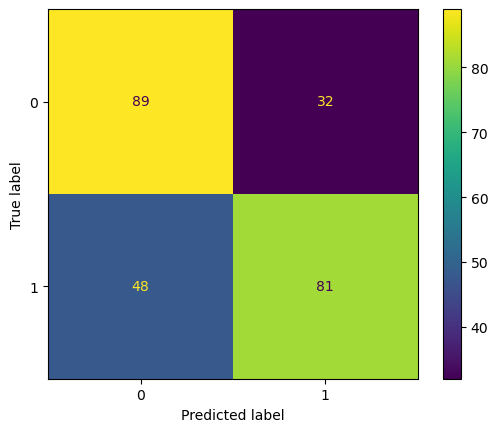

In [37]:
plot_confusion_matrix(y_pred1)

In [38]:
accuracy_1 = accuracy_score(y_test,y_pred1)
accuracy_1

0.68

In [39]:
accuracy_1 = accuracy_score(y_test, y_pred1)
precision_1 = precision_score(y_test, y_pred1, average='macro') 
recall_1 = recall_score(y_test, y_pred1, average='macro')  
f1_1 = f1_score(y_test, y_pred1, average='macro')

print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

Accuracy: 0.6800
Precision: 0.6832
Recall: 0.6817
F1 Score: 0.6797


#### (b) Naive Bayes

In [40]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [41]:
y_pred2 = nb_model.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[92 29]
 [46 83]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       121
           1       0.74      0.64      0.69       129

    accuracy                           0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



In [43]:
def plot_confusion_matrix(y_pred2):
    confusion = confusion_matrix(y_test,y_pred2)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

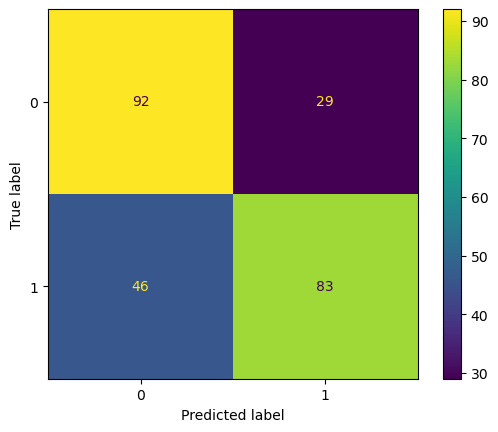

In [44]:
plot_confusion_matrix(y_pred2)

In [45]:
accuracy_2 = accuracy_score(y_test,y_pred2)
accuracy_2

0.7

In [46]:
accuracy_2 = accuracy_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2, average='macro') 
recall_2 = recall_score(y_test, y_pred2, average='macro')  
f1_2 = f1_score(y_test, y_pred2, average='macro')

print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

Accuracy: 0.7000
Precision: 0.7039
Recall: 0.7019
F1 Score: 0.6996


#### (c) Decision Tree

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred3 = dt_model.predict(X_test)

In [49]:
def plot_confusion_matrix(y_pred3):
    confusion = confusion_matrix(y_test,y_pred3)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

In [50]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[100  21]
 [ 40  89]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       121
           1       0.81      0.69      0.74       129

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



<Figure size 500x500 with 0 Axes>

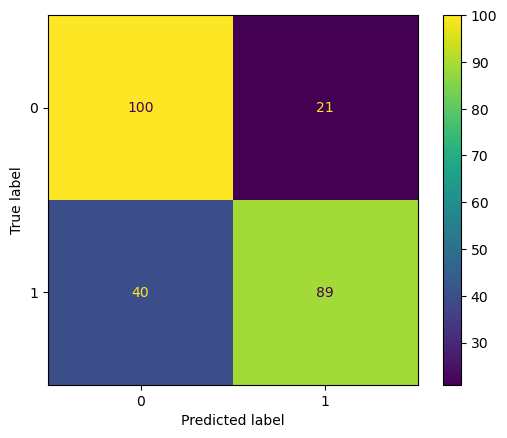

In [51]:
plot_confusion_matrix(y_pred3)

In [52]:
accuracy_3 = accuracy_score(y_test,y_pred3)
accuracy_3

0.756

In [53]:
accuracy_3 = accuracy_score(y_test, y_pred3)
precision_3 = precision_score(y_test, y_pred3, average='macro') 
recall_3 = recall_score(y_test, y_pred3, average='macro')  
f1_3 = f1_score(y_test, y_pred3, average='macro')

print(f"Accuracy: {accuracy_3:.4f}")
print(f"Precision: {precision_3:.4f}")
print(f"Recall: {recall_3:.4f}")
print(f"F1 Score: {f1_3:.4f}")


Accuracy: 0.7560
Precision: 0.7617
Recall: 0.7582
F1 Score: 0.7555


### (d). Random Forest

In [54]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features='sqrt',)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [55]:
y_pred4 = rf_model.predict(X_test)


In [56]:
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[ 94  27]
 [ 21 108]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       121
           1       0.80      0.84      0.82       129

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [57]:


from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, ConfusionMatrixDisplay

def plot_confusion_matrix(y_pred4):
    confusion = confusion_matrix(y_test,y_pred4)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

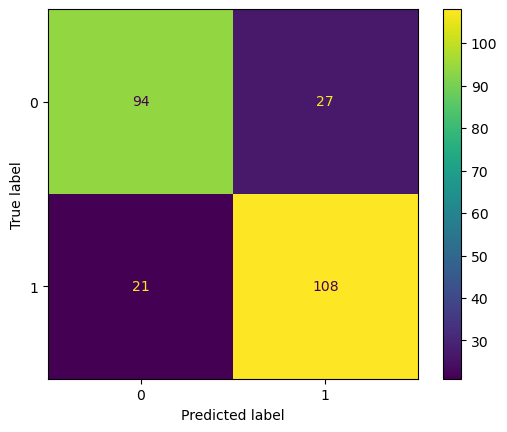

In [58]:
plot_confusion_matrix(y_pred4)

In [59]:
accuracy_4 = accuracy_score(y_test,y_pred4)
accuracy_4

0.808

In [60]:
accuracy_4 = accuracy_score(y_test, y_pred4)
precision_4 = precision_score(y_test, y_pred4, average='macro') 
recall_4 = recall_score(y_test, y_pred4, average='macro')  
f1_4 = f1_score(y_test, y_pred4, average='macro')

print(f"Accuracy: {accuracy_4:.4f}")
print(f"Precision: {precision_4:.4f}")
print(f"Recall: {recall_4:.4f}")
print(f"F1 Score: {f1_4:.4f}")



Accuracy: 0.8080
Precision: 0.8087
Recall: 0.8070
F1 Score: 0.8074


#### (e).XG Boost

In [61]:
# Define the parameter grid (param_distributions)
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size for each iteration
    'max_depth': [3, 5, 6, 8, 10],  # Maximum depth of trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of hessian (instance weight)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features per tree
    'gamma': [0, 1, 5],  # Minimum loss reduction
    'scale_pos_weight': [1, 2, 3],  # Adjust for class imbalance (if applicable)
    'objective': ['binary:logistic'],  # For binary classification
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model on the resampled training data (X_traine, y_train)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.8, 'scale_pos_weight': 1, 'objective': 'binary:logistic', 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6}


In [62]:
# Get the best model
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred5 = best_xgb_model.predict(X_test)

In [64]:
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

[[ 92  29]
 [ 17 112]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       121
           1       0.79      0.87      0.83       129

    accuracy                           0.82       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.82      0.82       250



In [65]:
def plot_confusion_matrix(y_pred5):
    confusion = confusion_matrix(y_test,y_pred4)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

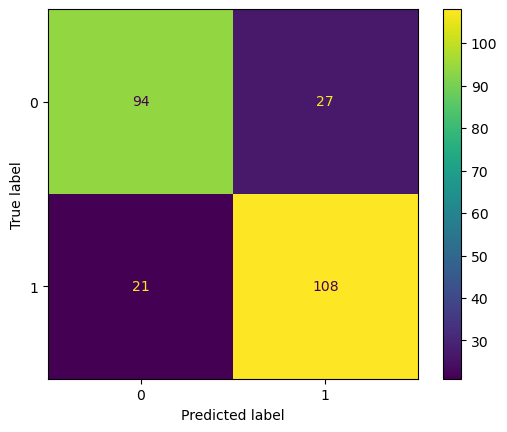

In [66]:
plot_confusion_matrix(y_pred5)

In [67]:
accuracy_5 = accuracy_score(y_test,y_pred5)
accuracy_5

0.816

In [68]:
accuracy_5 = accuracy_score(y_test, y_pred5)
precision_5 = precision_score(y_test, y_pred5, average='macro') 
recall_5 = recall_score(y_test, y_pred5, average='macro')  
f1_5 = f1_score(y_test, y_pred5, average='macro')

print(f"Accuracy: {accuracy_5:.4f}")
print(f"Precision: {precision_5:.4f}")
print(f"Recall: {recall_5:.4f}")
print(f"F1 Score: {f1_5:.4f}")

Accuracy: 0.8160
Precision: 0.8192
Recall: 0.8143
F1 Score: 0.8148


### (f) Logistic Regression

In [69]:
# Define the parameter grid (param_distributions)
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength (log scale)
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 300, 500],  # Maximum iterations for the solver
    'penalty': ['l2', 'l1'],  # Regularization term
    'class_weight': [None, 'balanced']  # Class balancing (if class imbalance exists)
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# RandomizedSearchCV to tune hyperparameters
random_search_lr = RandomizedSearchCV(estimator=lr_model, 
                                      param_distributions=param_dist, 
                                      n_iter=100, 
                                      cv=3, 
                                      verbose=2, 
                                      n_jobs=-1, 
                                      random_state=42)

# Fit the model on the resampled training data (X_train, y_train)
random_search_lr.fit(X_train, y_train)

# Best parameters found
print("Best parameters found for Logistic Regression: ", random_search_lr.best_params_)

# Get the best model
best_lr_model = random_search_lr.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found for Logistic Regression:  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'class_weight': 'balanced', 'C': 78.47599703514607}


In [70]:
best_lr_model.fit(X_train,y_train)

LogisticRegression(C=78.47599703514607, class_weight='balanced', max_iter=300,
                   solver='liblinear')

In [71]:
y_pred6 = best_lr_model.predict(X_test)

In [72]:
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[92 29]
 [45 84]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       121
           1       0.74      0.65      0.69       129

    accuracy                           0.70       250
   macro avg       0.71      0.71      0.70       250
weighted avg       0.71      0.70      0.70       250



In [73]:
def plot_confusion_matrix(y_pred6):
    confusion = confusion_matrix(y_test,y_pred4)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

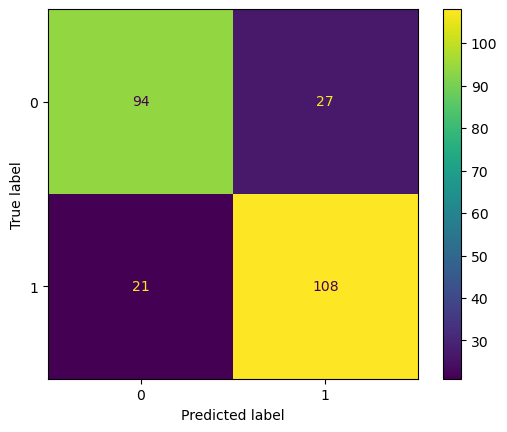

In [74]:
plot_confusion_matrix(y_pred6)

In [75]:
accuracy_6 = accuracy_score(y_test,y_pred6)
accuracy_6

0.704

In [76]:
accuracy_6 = accuracy_score(y_test, y_pred6)
precision_6 = precision_score(y_test, y_pred6, average='macro') 
recall_6 = recall_score(y_test, y_pred6, average='macro')  
f1_6 = f1_score(y_test, y_pred6, average='macro')

print(f"Accuracy: {accuracy_6:.4f}")
print(f"Precision: {precision_6:.4f}")
print(f"Recall: {recall_6:.4f}")
print(f"F1 Score: {f1_6:.4f}")


Accuracy: 0.7040
Precision: 0.7074
Recall: 0.7057
F1 Score: 0.7037


### Since desired accuracy is not achieved

### Go for PCA

In [77]:
pca = PCA(n_components=15)

In [78]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

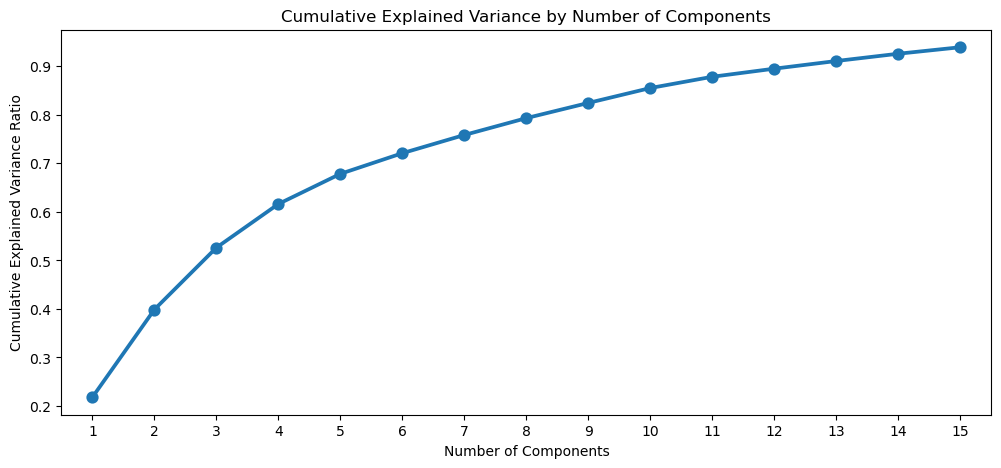

In [79]:
X_pca = pca.fit_transform(X_train)

# Compute cumulative explained variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.arange(1, len(cumulative) + 1)

# Plot cumulative explained variance
plt.figure(figsize=(12, 5))
sns.pointplot(x=n_components, y=cumulative)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance by Number of Components")
plt.show()

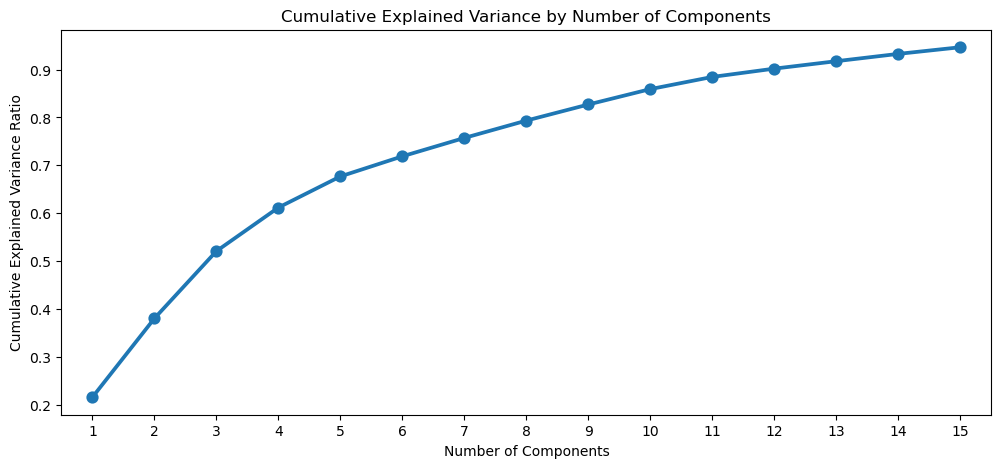

In [80]:
X_pca = pca.fit_transform(X_test)

# Compute cumulative explained variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.arange(1, len(cumulative) + 1)

# Plot cumulative explained variance
plt.figure(figsize=(12, 5))
sns.pointplot(x=n_components, y=cumulative)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance by Number of Components")
plt.show()

In [81]:
n_components = np.argmax(cumulative >= 0.70) + 1  # +1 to get the correct count

print(f"Number of components required to retain 70% variance: {n_components}")

Number of components required to retain 70% variance: 6


In [82]:
X_train_pca = PCA(n_components=6).fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)

In [83]:
X_test_pca = PCA(n_components=6).fit_transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)

In [84]:
X_train_pca

,0,1,2,3,4,5
0,-2.120988,-1.954280,1.480045,1.666095,0.910422,-0.357316
1,-2.613509,-0.996822,0.631208,0.785674,0.172688,1.449030
2,1.434302,-0.045569,0.563997,0.992150,0.483799,1.654903
3,-1.035588,-2.413359,-2.282047,-0.893574,0.271822,0.662555
4,1.507280,-0.903301,1.691182,-0.710365,1.719159,1.547535
...,...,...,...,...,...,...
995,2.540705,0.095027,0.389372,1.221374,0.644373,-0.046681
996,-0.820108,-2.577140,0.577431,0.115797,-0.409626,-0.708543
997,1.230412,0.063681,0.733649,-1.128507,-1.024922,-1.027525
998,1.122740,0.836644,0.590829,0.317548,-0.161471,-1.825116


In [85]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [86]:
y_test_df

,treatment
683,1
1108,1
397,0
936,1
500,1
...,...
384,1
681,1
1008,1
362,1


### (g). Apply Logistic Regression

In [87]:
# Define the parameter grid (param_distributions)
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength (log scale)
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 300, 500],  # Maximum iterations for the solver
    'penalty': ['l2', 'l1'],  # Regularization term
    'class_weight': [None, 'balanced']  # Class balancing (if class imbalance exists)
}

# Initialize the Logistic Regression model
lr_model1 = LogisticRegression()

# RandomizedSearchCV to tune hyperparameters
random_search_lr = RandomizedSearchCV(estimator=lr_model, 
                                      param_distributions=param_dist, 
                                      n_iter=100, 
                                      cv=3, 
                                      verbose=2, 
                                      n_jobs=-1, 
                                      random_state=42)

# Fit the model on the resampled training data 
random_search_lr.fit(X_train_pca, y_train_df)

# Best parameters found
print("Best parameters found for Logistic Regression: ", random_search_lr.best_params_)

# Get the best model
best_lr_model1 = random_search_lr.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 1438.44988828766}


In [88]:
best_lr_model1.fit(X_train_pca,y_train_df)

LogisticRegression(C=1438.44988828766, max_iter=500, solver='saga')

In [89]:
y_pred7= best_lr_model1.predict(X_test_pca)

In [90]:
y_pred7

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0])

In [91]:
print(confusion_matrix(y_test, y_pred7))
print(classification_report(y_test, y_pred7))

[[71 50]
 [62 67]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       121
           1       0.57      0.52      0.54       129

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250



In [92]:
accuracy_7 = accuracy_score(y_test,y_pred7)
accuracy_7

0.552

In [93]:
accuracy_7 = accuracy_score(y_test, y_pred7)
precision_7 = precision_score(y_test, y_pred7, average='macro') 
recall_7 = recall_score(y_test, y_pred7, average='macro')  
f1_7 = f1_score(y_test, y_pred7, average='macro')

print(f"Accuracy: {accuracy_7:.4f}")
print(f"Precision: {precision_7:.4f}")
print(f"Recall: {recall_7:.4f}")
print(f"F1 Score: {f1_7:.4f}")


Accuracy: 0.5520
Precision: 0.5532
Recall: 0.5531
F1 Score: 0.5519


In [94]:
def plot_confusion_matrix(y_pred7):
    confusion = confusion_matrix(y_test,y_pred7)
    plt.figure(figsize = (5,5))
    ConfusionMatrixDisplay(confusion).plot()
    plt.show()

<Figure size 500x500 with 0 Axes>

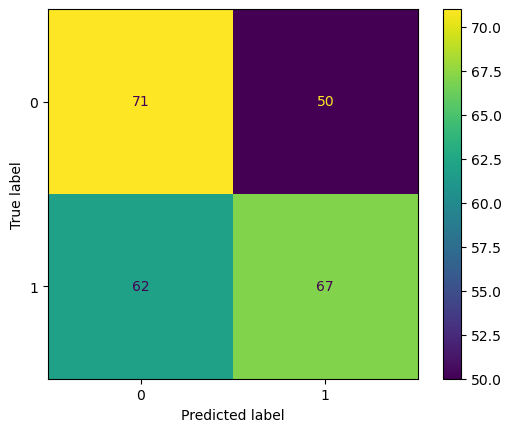

In [95]:
plot_confusion_matrix(y_pred7)

#### (h).XG Boost

In [ ]:
# Define the parameter grid (param_distributions)
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size for each iteration
    'max_depth': [3, 5, 6, 8, 10],  # Maximum depth of trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of hessian (instance weight)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features per tree
    'gamma': [0, 1, 5],  # Minimum loss reduction
    'scale_pos_weight': [1, 2, 3],  # Adjust for class imbalance (if applicable)
    'objective': ['binary:logistic'],  # For binary classification
}

# Initialize the XGBoost classifier
xgb_model1 = xgb.XGBClassifier()

# RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model on the resampled training data
random_search.fit(X_train_pca, y_train_df)

# Best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
best_xgb_model1 = random_search.best_estimator_
best_xgb_model1.fit(X_train_pca, y_train_df)

In [ ]:
y_pred8 = best_xgb_model1.predict(X_test_pca)

In [ ]:
accuracy_8 = accuracy_score(y_test_df,y_pred8)
accuracy_8

In [ ]:
accuracy_8 = accuracy_score(y_test, y_pred8)
precision_8 = precision_score(y_test, y_pred8, average='macro') 
recall_8 = recall_score(y_test, y_pred8, average='macro')  
f1_8 = f1_score(y_test, y_pred8, average='macro')

print(f"Accuracy: {accuracy_8:.4f}")
print(f"Precision: {precision_8:.4f}")
print(f"Recall: {recall_8:.4f}")
print(f"F1 Score: {f1_8:.4f}")

### Applied PCA still not get desired accuracy may be it is due to Loss of Important Information

### Lets take 80% variance in PCA and try

In [ ]:
n_components = np.argmax(cumulative >= 0.80) + 1  # +1 to get the correct count

print(f"Number of components required to retain 80% variance: {n_components}")

In [ ]:
X_train_pca = PCA(n_components=9).fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)

In [ ]:
X_test_pca = PCA(n_components=9).fit_transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)

In [ ]:
X_train_pca

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

### (i) Random Forest

In [ ]:
rf_model1 = RandomForestClassifier(n_estimators=1000, max_features='sqrt',)
rf_model1.fit(X_train_pca, y_train_df)

In [ ]:
y_pred9 = rf_model1.predict(X_test_pca)

In [ ]:
accuracy_9 = accuracy_score(y_test_df,y_pred9)
accuracy_9

In [ ]:
accuracy_9 = accuracy_score(y_test, y_pred9)
precision_9 = precision_score(y_test, y_pred9, average='macro') 
recall_9 = recall_score(y_test, y_pred9, average='macro')  
f1_9 = f1_score(y_test, y_pred9, average='macro')

print(f"Accuracy: {accuracy_9:.4f}")
print(f"Precision: {precision_9:.4f}")
print(f"Recall: {recall_9:.4f}")
print(f"F1 Score: {f1_9:.4f}")

### Applied PCA still not get desired accuracy may be it is due to Loss of Important Information

### Lets take 90% variance in PCA and try

In [ ]:
n_components = np.argmax(cumulative >= 0.90) + 1  # +1 to get the correct count

print(f"Number of components required to retain 90% variance: {n_components}")

In [ ]:
X_train_pca = PCA(n_components=12).fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)

In [ ]:
X_test_pca = PCA(n_components=12).fit_transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

### (j) Random Forest

In [ ]:
rf_model2 = RandomForestClassifier(n_estimators=1000, max_features='sqrt',)
rf_model2.fit(X_train_pca, y_train_df)

In [ ]:
y_pred10 = rf_model2.predict(X_test_pca)

In [ ]:
accuracy_10 = accuracy_score(y_test_df,y_pred10)
accuracy_10

In [ ]:
accuracy_10 = accuracy_score(y_test, y_pred10)
precision_10 = precision_score(y_test, y_pred10, average='macro') 
recall_10 = recall_score(y_test, y_pred10, average='macro')  
f1_10 = f1_score(y_test, y_pred10, average='macro')

print(f"Accuracy: {accuracy_10:.4f}")
print(f"Precision: {precision_10:.4f}")
print(f"Recall: {recall_10:.4f}")
print(f"F1 Score: {f1_10:.4f}")


### (k)Stacking

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))  # SVM requires probability=True for stacking
]

In [ ]:
meta_model = LogisticRegression()

In [ ]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)

In [ ]:
stacking_model.fit(X_train_pca, y_train_df)

In [ ]:
y_pred11 = stacking_model.predict(X_test_pca)

In [ ]:
accuracy_11 = accuracy_score(y_test_df, y_pred11)
accuracy_11

In [ ]:
accuracy_11 = accuracy_score(y_test, y_pred11)
precision_11 = precision_score(y_test, y_pred11, average='macro') 
recall_11 = recall_score(y_test, y_pred11, average='macro')  
f1_11 = f1_score(y_test, y_pred11, average='macro')

print(f"Accuracy: {accuracy_11:.4f}")
print(f"Precision: {precision_11:.4f}")
print(f"Recall: {recall_11:.4f}")
print(f"F1 Score: {f1_11:.4f}")

### (l). Apply stacking to the origional data

In [ ]:
estimators1 = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))  # SVM requires probability=True for stacking
]

In [ ]:
meta_model1 = LogisticRegression()

In [ ]:
stacking_model1 = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)

In [ ]:
stacking_model1.fit(X_train, y_train)

In [ ]:
y_pred12 = stacking_model1.predict(X_test)

In [ ]:
accuracy_12 = accuracy_score(y_test, y_pred12)
accuracy_12

In [ ]:
accuracy_12 = accuracy_score(y_test, y_pred12)
precision_12 = precision_score(y_test, y_pred12, average='macro') 
recall_12 = recall_score(y_test, y_pred12, average='macro')  
f1_12 = f1_score(y_test, y_pred12, average='macro')

print(f"Accuracy: {accuracy_12:.4f}")
print(f"Precision: {precision_12:.4f}")
print(f"Recall: {recall_12:.4f}")
print(f"F1 Score: {f1_12:.4f}")


### (m) Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier()

In [ ]:
adaboost.fit(X_train, y_train)

In [ ]:
y_pred13 = adaboost.predict(X_test)

In [ ]:
accuracy_13 = accuracy_score(y_test, y_pred13)
accuracy_13

In [ ]:
accuracy_13 = accuracy_score(y_test, y_pred13)
precision_13 = precision_score(y_test, y_pred13, average='macro') 
recall_13 = recall_score(y_test, y_pred13, average='macro')  
f1_13 = f1_score(y_test, y_pred13, average='macro')

print(f"Accuracy: {accuracy_13:.4f}")
print(f"Precision: {precision_13:.4f}")
print(f"Recall: {recall_13:.4f}")
print(f"F1 Score: {f1_13:.4f}")


### (n). ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Step 1: Define ANN Model
ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [ ]:
# Step 2: Compile Model
ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Train Model
ann_model = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

In [ ]:
# Step 4: Evaluate Model
accuracy_14 = ann.evaluate(X_test, y_test)
accuracy_14

### (o). Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[
    ('RF', rf_model), 
    ('XGboost', best_xgb_model), 
    ('LogisticRegression',best_lr_model),
    ('Stacking',stacking_model),], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

In [ ]:
y_pred15 = voting.predict(X_test)

In [ ]:
accuracy_15 = accuracy_score(y_test, y_pred15)
accuracy_15

In [ ]:
accuracy_15 = accuracy_score(y_test, y_pred15)
precision_15 = precision_score(y_test, y_pred15, average='macro') 
recall_15 = recall_score(y_test, y_pred15, average='macro')  
f1_15 = f1_score(y_test, y_pred15, average='macro')

print(f"Accuracy: {accuracy_15:.4f}")
print(f"Precision: {precision_15:.4f}")
print(f"Recall: {recall_15:.4f}")
print(f"F1 Score: {f1_15:.4f}")


### (p) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
y_pred16 = knn.predict(X_test)

In [ ]:
accuracy_16 = accuracy_score(y_test, y_pred16)
accuracy_16

In [ ]:
accuracy_16 = accuracy_score(y_test, y_pred16)
precision_16 = precision_score(y_test, y_pred16, average='macro') 
recall_16 = recall_score(y_test, y_pred16, average='macro')  
f1_16 = f1_score(y_test, y_pred16, average='macro')

print(f"Accuracy: {accuracy_16:.4f}")
print(f"Precision: {precision_16:.4f}")
print(f"Recall: {recall_16:.4f}")
print(f"F1 Score: {f1_16:.4f}")


# Selection of Model

In [ ]:
# List of all models
models = [svm_model,
nb_model,
dt_model,
rf_model,
best_xgb_model,
best_lr_model,
stacking_model1,
adaboost,
voting,
knn
]

# Model names corresponding to each model
model_names = [
    "SVM", "Naive Bayes", "Decision Tree", "Random Forest", "XGBoost", 
    "Logistic Regression", "Stacking", "AdaBoost", "Voting Classifier", "KNN"
]

# Initialize a dictionary to store the metrics for each model
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluate each model and compute metrics
for model in models:
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Plotting the results
metric_names = list(metrics.keys())
x = np.arange(len(models))

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison')

for i, metric in enumerate(metric_names):
    ax = axes[i//2, i%2]
    ax.bar(x, metrics[metric], tick_label=model_names, alpha=0.7)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(model_names, rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
import shap

In [ ]:
# Create a SHAP explainer using the best XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_train)

In [ ]:
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to view the mean SHAP values for each feature
mean_shap_df = pd.DataFrame(mean_shap_values, index=X_train.columns, columns=["Mean SHAP Value"])

# Sort by mean SHAP value in descending order
mean_shap_df = mean_shap_df.sort_values(by="Mean SHAP Value", ascending=False)

# Display the mean SHAP values
print(mean_shap_df)

In [ ]:
plt.figure(figsize=(10, 6))
mean_shap_df.plot(kind='barh', legend=False, color='skyblue')
plt.title("Mean SHAP Value for Each Feature")
plt.xlabel("Mean SHAP Value")
plt.ylabel("Features")
plt.show()

# User Input

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = best_xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_proba)  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_new = [[23,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0]]
prediction = best_xgb_model.predict(X_new)
probabilities = best_xgb_model.predict_proba(X_new)
print(f"Predicted Class: {prediction[0]}")

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Label encoders for categorical variables
label_encoders = {
    'Gender': LabelEncoder(),
    'self_employed': LabelEncoder(),
    'family_history': LabelEncoder(),
    'work_interfere': LabelEncoder(),
    'no_employees': LabelEncoder(),
    'remote_work': LabelEncoder(),
    'tech_company': LabelEncoder(),
    'benefits': LabelEncoder(),
    'care_options': LabelEncoder(),
    'wellness_program': LabelEncoder(),
    'seek_help': LabelEncoder(),
    'anonymity': LabelEncoder(),
    'leave': LabelEncoder(),
    'mental_health_consequence': LabelEncoder(),
    'phys_health_consequence': LabelEncoder(),
    'coworkers': LabelEncoder(),
    'supervisor': LabelEncoder(),
    'mental_health_interview': LabelEncoder(),
    'phys_health_interview': LabelEncoder(),
    'mental_vs_physical': LabelEncoder(),
    'obs_consequence': LabelEncoder(),
}

# Preprocessing function (label encoding and filling missing values)
def preprocess_input(input_data):
    input_data_encoded = input_data.copy()
    for col in input_data.columns:
        if col in label_encoders:
            input_data_encoded[col] = label_encoders[col].fit_transform(input_data[col])
    input_data_encoded = input_data_encoded.fillna(input_data_encoded.mode().iloc[0])
    return input_data_encoded

# Function to get user input with options
def get_user_input():
    print("Please select an option for each category:\n")

    # Collect data based on the specified order
    Age = int(input("Enter Age (1 to 99): "))
    while Age < 1 or Age > 99:
        print("Please enter a valid Age between 1 and 99.")
        Age = int(input("Enter Age (1 to 99): "))

    Gender = input("Enter Gender (0: Female / 1: Male / 2: Other):")
    self_employed = input("Enter self_employed (0: No / 1: Yes/ 2: NA):")
    family_history = input("Enter family_history (0: No / 1: Yes): ")
    work_interfere = input("Enter work_interfere (0: Never / 1: Often / 2: Rarely / 3: Sometimes / 4: NA): ")
    no_employees = input("Enter no_employees (0: 1-5 / 1: 100-500 / 2: 26-100 / 3: 500-1000 / 4: 6-25 / 5: More than 1000): ")
    remote_work = input("Enter remote_work (0: No / 1: Yes): ")
    tech_company = input("Enter tech_company (0: No / 1: Yes): ")
    benefits = input("Enter benefits (0: No / 1: Do not know / 2: Yes): ")
    care_options = input("Enter care_options (0: No / 1: Not sure / 2: Yes): ")
    wellness_program = input("Enter wellness_program (0: Do not know / 1: No / 2: Yes): ")
    seek_help = input("Enter seek_help (0: Do not know / 1: No / 2: Yes): ")
    anonymity = input("Enter anonymity (0: Do not know / 1: No / 2: Yes): ")
    leave = input("Enter leave (0: Do not know / 1: Somewhat difficult / 2: Somewhat easy / 3: Very difficult / 4: Very easy): ")
    mental_health_consequence = input("Enter mental_health_consequence (0: Maybe / 1: No / 2: Yes): ")
    phys_health_consequence = input("Enter phys_health_consequence (0: Maybe / 1: No / 2: Yes): ")
    coworkers = input("Enter coworkers (0: No / 1: Some of them / 2: Yes): ")
    supervisor = input("Enter supervisor (0: No / 1: Some of them / 2: Yes): ")
    mental_health_interview = input("Enter mental_health_interview (0: Maybe / 1: No / 2: Yes): ")
    phys_health_interview = input("Enter phys_health_interview (0: Maybe / 1: No / 2: Yes): ")
    mental_vs_physical = input("Enter mental_vs_physical (0: Do not know / 1: No / 2: Yes): ")
    obs_consequence = input("Enter obs_consequence (0: No / 1: Yes): ")


    # Map the input to the corresponding value
    options = {
        'Gender': ['Female', 'Male', 'Other'],
        'self_employed': ['Yes', 'No'],
        'family_history': ['Yes', 'No'],
        'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes'],
        'no_employees': ['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
        'remote_work': ['Yes', 'No'],
        'tech_company': ['Yes', 'No'],
        'benefits': ['Yes', 'Do not know', 'No'],
        'care_options': ['Yes', 'No', 'Not sure'],
        'wellness_program': ['Yes', 'Do not know', 'No'],
        'seek_help': ['Yes', 'Do not know', 'No'],
        'anonymity': ['Yes', 'Do not know', 'No'],
        'leave': ['Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult'],
        'mental_health_consequence': ['Yes', 'Maybe', 'No'],
        'phys_health_consequence': ['Yes', 'Maybe', 'No'],
        'coworkers': ['Yes', 'No', 'Some of them'],
        'supervisor': ['Yes', 'No', 'Some of them'],
        'mental_health_interview': ['Yes', 'No', 'Maybe'],
        'phys_health_interview': ['Yes', 'No', 'Maybe'],
        'mental_vs_physical': ['Yes', 'No', 'Do not know'],
        'obs_consequence': ['Yes', 'No']
    }

    data = {
        'Age': Age,
        'Gender': options['Gender'][int(Gender)-1],
        'self_employed': options['self_employed'][int(self_employed)-1],
        'family_history': options['family_history'][int(family_history)-1],
        'work_interfere': options['work_interfere'][int(work_interfere)-1],
        'no_employees': options['no_employees'][int(no_employees)-1],
        'remote_work': options['remote_work'][int(remote_work)-1],
        'tech_company': options['tech_company'][int(tech_company)-1],
        'benefits': options['benefits'][int(benefits)-1],
        'care_options': options['care_options'][int(care_options)-1],
        'wellness_program': options['wellness_program'][int(wellness_program)-1],
        'seek_help': options['seek_help'][int(seek_help)-1],
        'anonymity': options['anonymity'][int(anonymity)-1],
        'leave': options['leave'][int(leave)-1],
        'mental_health_consequence': options['mental_health_consequence'][int(mental_health_consequence)-1],
        'phys_health_consequence': options['phys_health_consequence'][int(phys_health_consequence)-1],
        'coworkers': options['coworkers'][int(coworkers)-1],
        'supervisor': options['supervisor'][int(supervisor)-1],
        'mental_health_interview': options['mental_health_interview'][int(mental_health_interview)-1],
        'phys_health_interview': options['phys_health_interview'][int(phys_health_interview)-1],
        'mental_vs_physical': options['mental_vs_physical'][int(mental_vs_physical)-1],
        'obs_consequence': options['obs_consequence'][int(obs_consequence)-1]
    }

    input_data = pd.DataFrame([data])

    return input_data

# Prediction function
def predict_treatment(best_xgb_model):
    input_data = get_user_input()

    # Preprocess the input data
    input_data_encoded = preprocess_input(input_data)
    
    # Make prediction using the XGBoost model
    prediction = best_xgb_model.predict(input_data_encoded)

    # Display prediction result
    if prediction == 0:
        print("Treatment: No")
    else:
        print("Treatment: Yes")

# Call this function to interact with the user and predict
predict_treatment(best_xgb_model)
